In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import xlrd
import openpyxl

In [2]:
df = pd.read_excel(r'C:\Users\ABC\Downloads\nifty.xlsx')

In [3]:
df.head(3)

,Date,High,Low,Close
0,2000-01-03,1592.90,1482.15,1592.2
1,2000-01-04,1641.95,1594.40,1638.7
2,2000-01-05,1635.50,1555.05,1595.8


In [36]:
df1 = df.copy()

In [37]:
m = 50 # shorter moving period
n = 150 # longer moving period

In [38]:
df1['SMA50'] = np.round(df1['Close'].rolling(window=m).mean(),2)
df1['SMA150'] = np.round(df1['Close'].rolling(window=n).mean(),2)

In [39]:
df1.tail(3)

,Date,High,Low,Close,SMA50,SMA150
5043,2020-04-21,9044.40,8909.40,8981.45,10213.69,11291.23
5044,2020-04-22,9209.75,8946.25,9187.30,10157.85,11279.12
5045,2020-04-23,9343.60,9170.15,9313.90,10102.34,11267.64


In [40]:
df1['SMA50'] = df1['SMA50'].shift(1)
df1['SMA150'] = df1['SMA150'].shift(1)

In [41]:
df1.tail(3)

,Date,High,Low,Close,SMA50,SMA150
5043,2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32
5044,2020-04-22,9209.75,8946.25,9187.30,10213.69,11291.23
5045,2020-04-23,9343.60,9170.15,9313.90,10157.85,11279.12


In [ ]:
#df1.to_excel(r'C:\Users\ABC\Downloads\test.xlsx')

In [42]:
df1.set_index('Date', inplace=True)

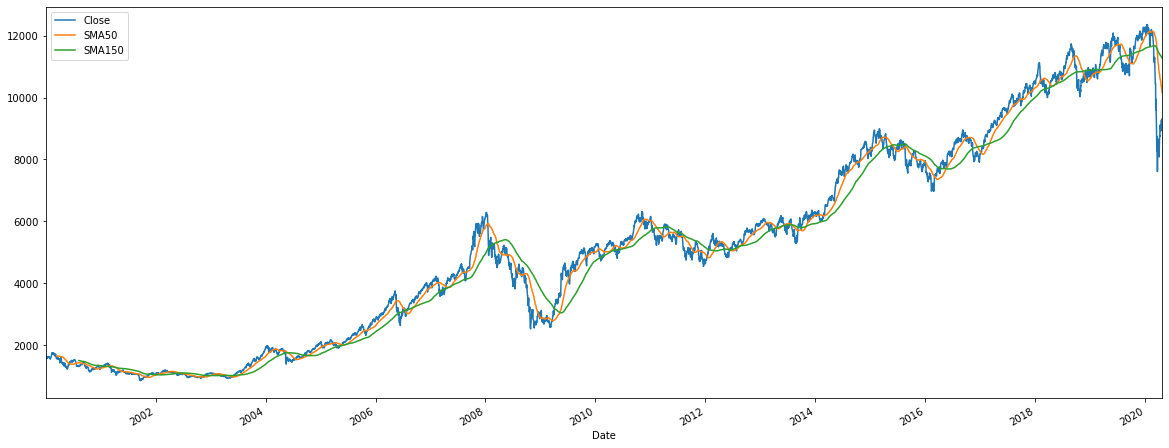

In [43]:
df1[['Close','SMA50','SMA150']].plot(figsize = (20,8))

In [44]:
#fig = go.Figure()

In [15]:
# fig.add_trace(go.Scatter(x = df1.index, y = df1['Close'], mode = 'lines', name = 'Close'))
# fig.add_trace(go.Scatter(x = df1.index, y = df1['SMA50'], mode = 'lines', name = 'SMA 50'))
# fig.add_trace(go.Scatter(x = df1.index, y = df1['SMA150'], mode = 'lines', name = 'SMA 150'))
# fig.show()

In [45]:
df1.tail(5)

,High,Low,Close,SMA50,SMA150
Date,,,,,
2020-04-17,9324.00,9091.35,9266.75,10370.13,11325.42
2020-04-20,9390.85,9230.80,9261.85,10316.22,11314.90
2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32
2020-04-22,9209.75,8946.25,9187.30,10213.69,11291.23
2020-04-23,9343.60,9170.15,9313.90,10157.85,11279.12


In [46]:
df1['Signal'] = np.where((df1.SMA50 > df1.SMA150)&(df1.SMA50.shift(1) < df1.SMA150.shift(1)),1,0)

In [47]:
df1['Signal'] = np.where((df1.SMA50 < df1.SMA150)&(df1.SMA50.shift(1) > df1.SMA150.shift(1)),-1,df1['Signal'])

In [ ]:
#df1.to_excel(r'C:\Users\ABC\Downloads\test.xlsx')

In [48]:
df1['Signal'].replace(to_replace=0, method='ffill', inplace=True)

In [49]:
df1.tail(3)

,High,Low,Close,SMA50,SMA150,Signal
Date,,,,,,
2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32,-1
2020-04-22,9209.75,8946.25,9187.30,10213.69,11291.23,-1
2020-04-23,9343.60,9170.15,9313.90,10157.85,11279.12,-1


In [50]:
df1['Daily_Return'] = df1['Close'] - df1['Close'].shift(1)

In [51]:
df1

,High,Low,Close,SMA50,SMA150,Signal,Daily_Return
Date,,,,,,,
2000-01-03,1592.90,1482.15,1592.20,NaN,NaN,0,NaN
2000-01-04,1641.95,1594.40,1638.70,NaN,NaN,0,46.50
2000-01-05,1635.50,1555.05,1595.80,NaN,NaN,0,-42.90
2000-01-06,1639.00,1595.80,1617.60,NaN,NaN,0,21.80
2000-01-07,1628.25,1597.20,1613.30,NaN,NaN,0,-4.30
...,...,...,...,...,...,...,...
2020-04-17,9324.00,9091.35,9266.75,10370.13,11325.42,-1,273.95
2020-04-20,9390.85,9230.80,9261.85,10316.22,11314.90,-1,-4.90
2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32,-1,-280.40


In [52]:
df1['Daily_Return'] = df1['Daily_Return'] * df1['Signal'].shift(1)

In [53]:
df1.tail(5)

,High,Low,Close,SMA50,SMA150,Signal,Daily_Return
Date,,,,,,,
2020-04-17,9324.00,9091.35,9266.75,10370.13,11325.42,-1,-273.95
2020-04-20,9390.85,9230.80,9261.85,10316.22,11314.90,-1,4.90
2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32,-1,280.40
2020-04-22,9209.75,8946.25,9187.30,10213.69,11291.23,-1,-205.85
2020-04-23,9343.60,9170.15,9313.90,10157.85,11279.12,-1,-126.60


In [54]:
df1['Cum_Return'] = df1['Daily_Return'].cumsum()

In [59]:
#df1.to_excel(r'C:\Users\ABC\Downloads\test1.xlsx')

In [60]:
df1.tail()

,High,Low,Close,SMA50,SMA150,Signal,Daily_Return,Cum_Return
Date,,,,,,,,
2020-04-17,9324.00,9091.35,9266.75,10370.13,11325.42,-1,-273.95,542.55
2020-04-20,9390.85,9230.80,9261.85,10316.22,11314.90,-1,4.90,547.45
2020-04-21,9044.40,8909.40,8981.45,10268.22,11304.32,-1,280.40,827.85
2020-04-22,9209.75,8946.25,9187.30,10213.69,11291.23,-1,-205.85,622.00
2020-04-23,9343.60,9170.15,9313.90,10157.85,11279.12,-1,-126.60,495.40


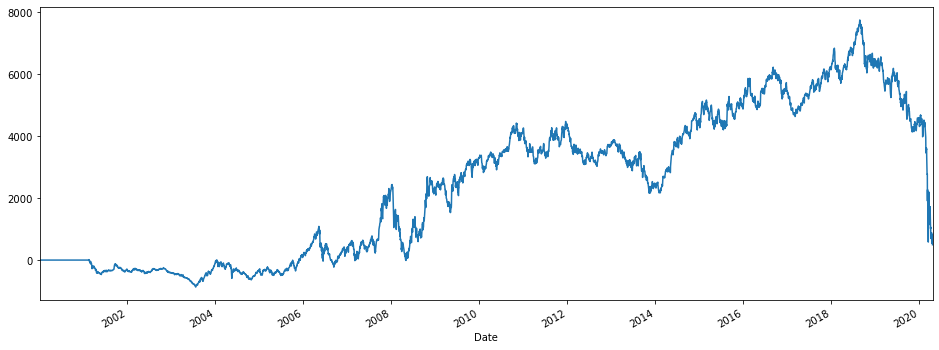

In [62]:
df1['Cum_Return'].plot(figsize = (16,6))